# Keras 利用預先訓練神經網路特徵萃取法訓練貓狗分類器

## 透過 Kaggle API 下載 Play Dataset

先從 Kaggle 下載資料集，這裡需要註冊 Kaggle 的帳號，並且取得 API Key，記得置換為自己的 API Token 才能下載資料。

In [ ]:
#!pip install kaggle
api_token = {"username":"your_username","key":""}
import json
import zipfile
import os

if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

if not os.path.exists("/kaggle"):
    os.makedirs("/kaggle")
os.chdir('/kaggle')
!kaggle datasets download -d chetankv/dogs-cats-images

!ls -alh '/kaggle'

dogs-cats-images.zip: Skipping, found more recently modified local copy (use --force to force download)
total 435M
drwxr-xr-x 4 root root 4.0K May 21 04:24  .
drwxr-xr-x 1 root root 4.0K May 21 04:24  ..
drwxr-xr-x 4 root root 4.0K May 21 04:24  dataset
-rw-r--r-- 1 root root 435M May 21 04:24  dogs-cats-images.zip
drwxr-xr-x 3 root root 4.0K May 21 04:24 'dog vs cat'


In [ ]:
!unzip 'dogs-cats-images.zip' > /dev/null

replace dataset/test_set/cats/cat.4001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


看看資料的基本結構，貓與狗訓練資料夾各有 4000 張，測試資料夾各有 1000 張影像

In [ ]:
!echo "training_set cats: "
!echo `ls -alh '/kaggle/dataset/training_set/cats' | grep cat | wc -l`
!echo "training_set dogs: "
!echo `ls -alh '/kaggle/dataset/training_set/dogs' | grep dog | wc -l`
!echo "test_set cats: "
!echo `ls -alh '/kaggle/dataset/test_set/cats' | grep cat | wc -l`
!echo "test_set dogs: "
!echo `ls -alh '/kaggle/dataset/test_set/dogs' | grep dog | wc -l`

training_set cats: 
4000
training_set dogs: 
4000
test_set cats: 
1000
test_set dogs: 
1000


In [ ]:


import os, shutil

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/kaggle/dataset'

# The directory where we will
# store our smaller dataset
base_dir = '/play'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1, 1001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'training_set', 'cats', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(4001, 4501)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'test_set', 'cats', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(4501, 5001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'test_set', 'cats', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1, 1001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'training_set', 'dogs', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(4001, 4501)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'test_set', 'dogs', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(4501, 5001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'test_set', 'dogs', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## 預先訓練神經網路的特徵萃取法

我們知道 CNN 卷積層的訓練需要很多數據與運算資源，在資料集不足的情況下，從頭訓練卷積層不是一個聰明的方法。何不直接採用大神訓練好的卷積層，加速 AI Time to Market。由於卷積網路可以學習影像特徵，越接近 Input 的 Layer 所能理解的特徵越「普適」而且抽象，像是紋理、顏色等等。越後面的 Layer 所學習到的特徵越接近物體的描述，像是耳朵、眼睛等等。

這裡我們採用 VGG16 Model，並提取 imagenet 包含 CNN 網路，這裡的網路已經經過大量的訓練，可以分辨圖片中的各種特徵。我們可以看到 CNN 在沒有連接層的情況下有 14,714,688 個參數，可見訓練過程實在很耗費運算。

In [ ]:
# 載入 VGG 網路 Convolutional Base
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,             # 不包含 Full Connection
                  input_shape=(150, 150, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

接下來透過已經訓練好的卷積網路來萃取特徵，這裡的程式將圖片影像直接送入卷積網路，透過 predict 將計算出的數值儲存起來，後續會用來訓練 Full Connection 分類網路。

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 使用特徵訓練網路

由於我們剛剛已經用 VGG16 CNN 抽取特徵，因此真正訓練分類網路的時候就不是輸入圖片，而是輸入這些計算好的特徵。

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 355us/step - loss: 0.6112 - acc: 0.6650 - val_loss: 0.4516 - val_acc: 0.8320
Epoch 2/30
2000/2000 [==============================] - 1s 286us/step - loss: 0.4257 - acc: 0.8100 - val_loss: 0.3708 - val_acc: 0.8620
Epoch 3/30
2000/2000 [==============================] - 1s 284us/step - loss: 0.3578 - acc: 0.8570 - val_loss: 0.3348 - val_acc: 0.8700
Epoch 4/30
2000/2000 [==============================] - 1s 293us/step - loss: 0.3160 - acc: 0.8685 - val_loss: 0.3121 - val_acc: 0.8740
Epoch 5/30
2000/2000 [==============================] - 1s 290us/step - loss: 0.2878 - acc: 0.8860 - val_loss: 0.2965 - val_acc: 0.8780
Epoch 6/30
2000/2000 [==============================] - 1s 286us/step - loss: 0.2679 - acc: 0.8965 - val_loss: 0.2869 - val_acc: 0.8800
Epoch 7/30
2000/2000 [==============================] - 1s 281us/step - loss: 0.2547 - acc: 0.8985 - val_loss: 0.2781 - val_acc: 0.8850


# 透過圖表分析訓練過程

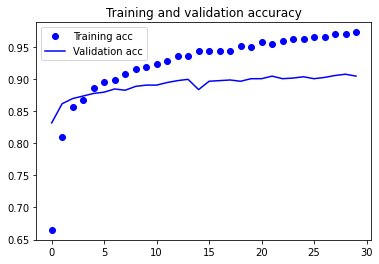

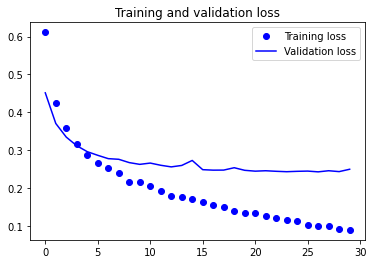

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

透過這樣的方法可以獲得將約 0.9 的正確性，效果比資料擴增法又好上一點。如果合併兩種方法 (資料擴充 + 特增萃取)，成本會高一些，但是可以提升到 0.95 的正確性。